In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
#import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
        normalize = False,
        title = None,
        cmap = plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[: , np.newaxis]
        print("Normalized confusion matrix")
    else :
        print('Confusion matrix, without normalization')

    print(cm)

    classes = ['Painting']

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap)
    ax.figure.colorbar(im, ax = ax)# We want to show all ticks...
    ax.set(xticks = np.arange(cm.shape[1]),
        yticks = np.arange(cm.shape[0]),
        xticklabels = classes, yticklabels = classes,
        title = title,
        ylabel = 'True label',
        xlabel = 'Predicted label')

    plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right",
        rotation_mode = "anchor")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                ha = "center", va = "center",
                color = "white"
                if cm[i, j] > thresh
                else "black")
    plt.show()
    return ax

In [4]:
X = np.array(pd.read_csv('feature_vector.csv'))
y = np.array(pd.read_csv('window_labels.csv'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()

KNN : 100.0 %
Precision:  [1. 1. 1.]
Recall:  [1. 1. 1.]
BCR:  1.0
Confusion matrix, without normalization
[[21  0  0]
 [ 0 23  0]
 [ 0  0 29]]


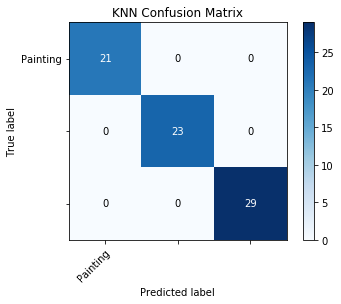

In [5]:
clf1 = KNeighborsClassifier(n_neighbors=7);
clf1.fit(X_train, y_train);
print("KNN :", clf1.score(X_test, y_test)*100 , "%")
y_pred = clf1.predict(X_test)
print("Precision: ", precision_score(y_test, y_pred, average=None))
print("Recall: ", recall_score(y_test, y_pred, average=None))
print("BCR: ", balanced_accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=['Painting', 'Thank You', 'Sorry'], title='KNN Confusion Matrix')
plt.show()

In [7]:
clf2 = svm.SVC(kernel='rbf', gamma='scale');
clf2.fit(X_train, y_train);
print("SVM :", clf2.score(X_test, y_test)*100 , "%")
y_pred = clf2.predict(X_test)
print("Precision: ", precision_score(y_test, y_pred, average=None))
print("Recall: ", recall_score(y_test, y_pred, average=None))
print("BCR: ", balanced_accuracy_score(y_test, y_pred))

SVM : 100.0 %
Precision:  [1. 1. 1.]
Recall:  [1. 1. 1.]
BCR:  1.0


In [8]:
clf3 = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=0);
clf3.fit(X_train, y_train);
print("RnF :", clf3.score(X_test, y_test)*100 , "%")
y_pred = clf3.predict(X_test)
print("Precision: ", precision_score(y_test, y_pred, average=None))
print("Recall: ", recall_score(y_test, y_pred, average=None))
print("BCR: ", balanced_accuracy_score(y_test, y_pred))

RnF : 100.0 %
Precision:  [1. 1. 1.]
Recall:  [1. 1. 1.]
BCR:  1.0


In [9]:
clf4 = DecisionTreeClassifier();
clf4.fit(X_train, y_train);
print("DT :", clf4.score(X_test, y_test)*100 , "%")
y_pred = clf4.predict(X_test)
print("Precision: ", precision_score(y_test, y_pred, average=None))
print("Recall: ", recall_score(y_test, y_pred, average=None))
print("BCR: ", balanced_accuracy_score(y_test, y_pred))

DT : 100.0 %
Precision:  [1. 1. 1.]
Recall:  [1. 1. 1.]
BCR:  1.0
